## Level Set Method for Image Segmentation

The method is based on the paper **Retina Image Vessel Segmentation Using a Hybrid CGLI Level Set Method** by Chen et al.

**Note:** The Gaussian convolution used in the paper is replaced with a heat equation using FFT.

In [1]:
# Import libararies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from scipy.fftpack import dct, idct # for Fourier transforms
from nptyping import NDArray, Float64
from lsm import *

%load_ext autoreload
%autoreload 2

In [20]:

# A function that runs the level set method with a given image.
def run_lsm(image, lsm, step_size=1, max_iter=10, print_every=10, do_plot=True):

    
    for outer_iter in range(max_iter):
        # initianlize phi
        lsm.phi[lsm.phi<0]  =  -lsm.rho
        lsm.phi[lsm.phi>=0] =   lsm.rho

        # apply heat equation
        lsm.phi = lsm.conv(lsm.phi)

        # compute f1 and f2
        lsm.compute_local_bin_value(image)

        # compute c1 and c2
        lsm.compute_the_region_average_intensity(image)

        # Compute Spf
        lsm.compute_the_local_global_force(image)

        # compute |\nabla phi|
        lsm.compute_absolute_gradient()

        # update phi
        lsm.update_phi(step_size, image)
        
        # print iteration and show images if do_plot == True
        if(outer_iter % print_every == 0):
            print("Iter: {:3d}".format(outer_iter))
            if do_plot:
                fig,ax = plt.subplots(1,2,figsize=(10,5))
                ax[0].imshow(image, 'bone')
                ax[0].set_title("Image")
                ax[1].contour(np.flipud(lsm.phi))
                ax[1].set_title("iter: {:3d}".format(outer_iter))
                plt.tight_layout()
                plt.show()
    return lsm.phi

## Create a lsm object

In [24]:
# Define parameters
n1 = 512
n2 = 512
rho = 1
sigma = 1e-6
omega = 0.5
epsilon = 0.5

x = np.linspace(0.5/n1,1-0.5/n1,n1)
y = np.linspace(0.5/n2,1-0.5/n2,n2)
x, y = np.meshgrid(x,y)

lsm = LSM(n1,n2,rho,sigma,omega,epsilon)

## Import images

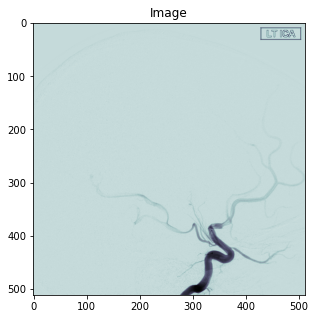

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

# Create an image
# image = np.zeros((n2,n1))

# image[:,:] = -1
# image[((x-0.4)*(x-0.4)+(y-0.4)*(y-0.4)<0.2*0.2) | ((x-0.6)*(x-0.6)+(y-0.6)*(y-0.6)<0.2*0.2)] = 1


# Import an image
image = mpimg.imread('./external_images/74al.png')
image = cv2.resize(image, (n2,n1))

ax.imshow(image,'bone')
plt.title("Image")
plt.show()

Iter:   0


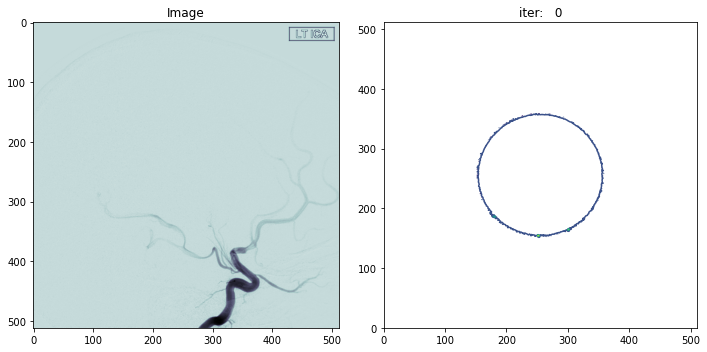

Iter:  20


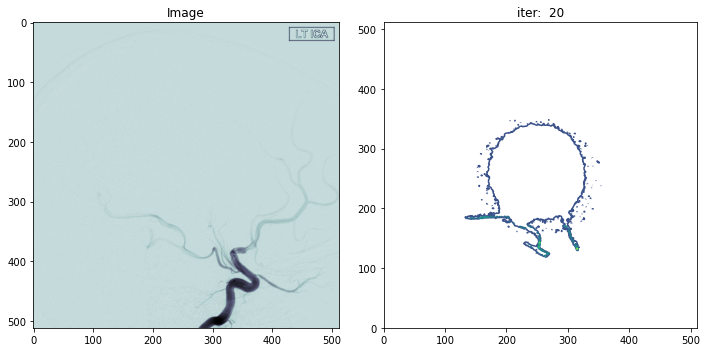

Iter:  40


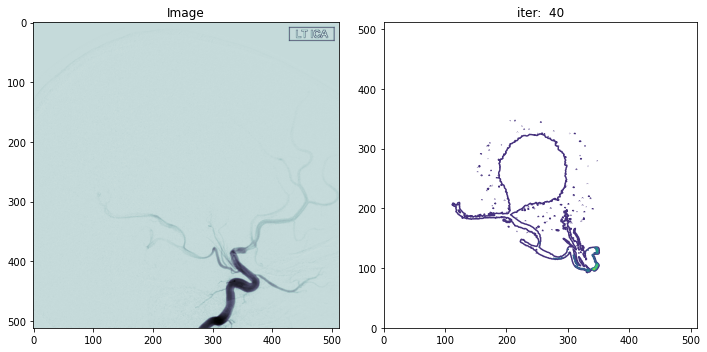

Iter:  60


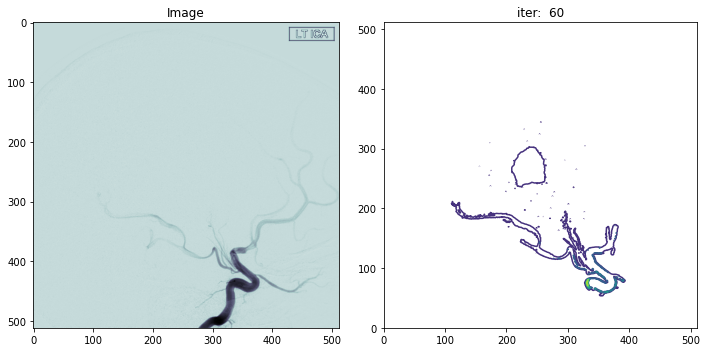

Iter:  80


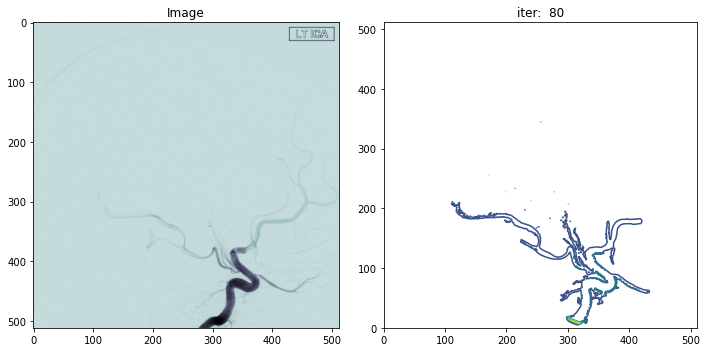

Iter: 100


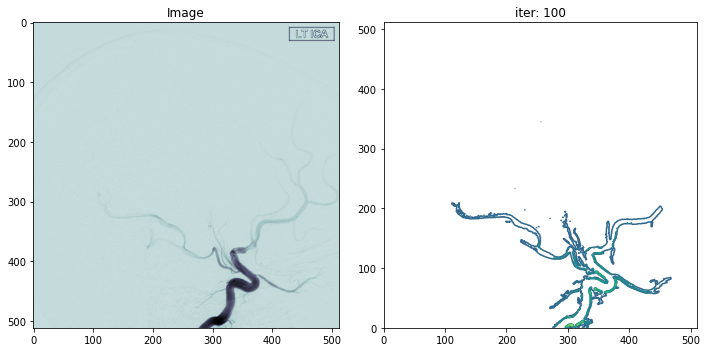

Iter: 120


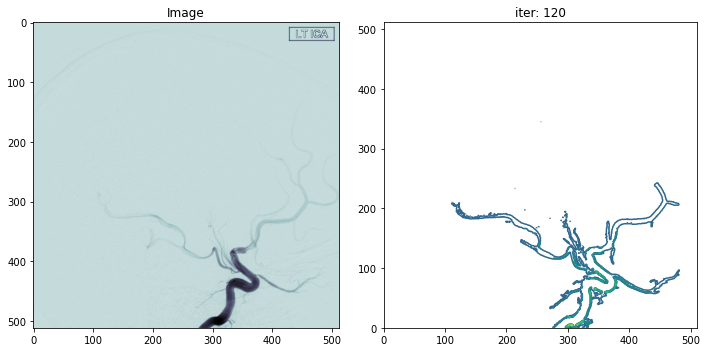

Iter: 140


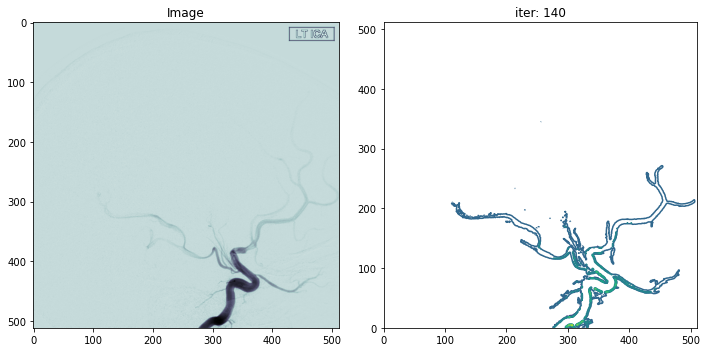

Iter: 160


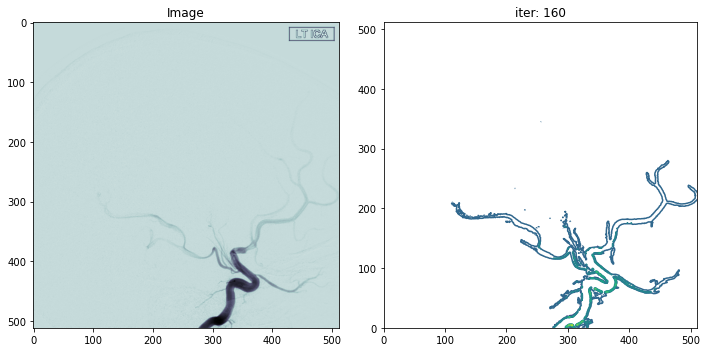

Iter: 180


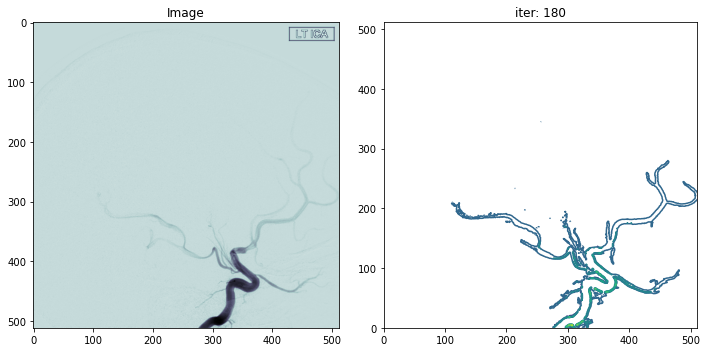

In [28]:
# Run a method
max_iter = 200 # Maximum iterations
print_every = 20 # Verbose. Print every [print_every] iteration.
step_size = 400 # step size of the method

# initailize phi with a quadratic function. 
# Modify the function to initialize phi with a different function.
lsm.initialize_phi() 

# Run a method.
phi = run_lsm(image, lsm, step_size=step_size, max_iter=max_iter, print_every=print_every, do_plot=True)

## Potting the result

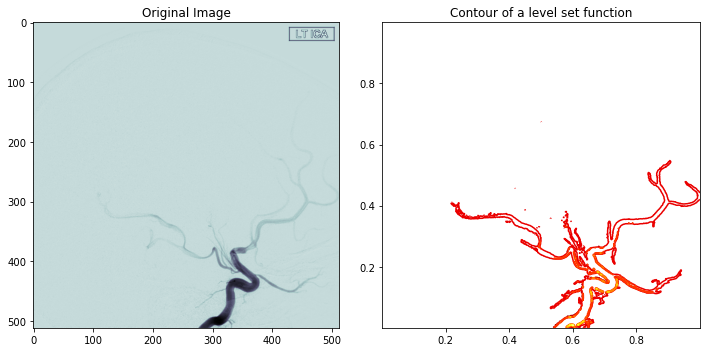

In [29]:
# Plot the result
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(image, 'bone')
ax[0].set_title("Original Image")
ax[1].contour(x,y,np.flipud(phi), cmap='hot')
ax[1].set_title("Contour of a level set function")
plt.tight_layout()
plt.show()